### Load data

In [1]:
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Load dataset 
df = joblib.load('refractive_index_merged_v2.pkl')

# Define features and target variable
features = joblib.load('features.pkl')
print('No. of features', len(features))

df.head()

No. of features 3638


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,LUMO_element_ohe_Zn,LUMO_element_ohe_Zr,crystal_system_ohe_cubic,crystal_system_ohe_hexagonal,crystal_system_ohe_monoclinic,crystal_system_ohe_orthorhombic,crystal_system_ohe_tetragonal,crystal_system_ohe_triclinic,crystal_system_ohe_trigonal,n
0,0.0,0.0,0.0,0.0,1,0.539020,0.134755,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1.752064
1,0.0,0.0,0.0,0.0,1,0.820234,0.195831,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1.652859
2,0.0,0.0,0.0,0.0,1,0.820234,0.196156,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,1.867858
3,0.0,0.0,0.0,0.0,1,0.771501,0.159155,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,2.676887
4,0.0,0.0,0.0,0.0,1,0.779730,0.165597,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1.793232


In [3]:
target = 'n'

## Limit the range of interest
# Highest refractive index under natural condition (i.e. Germanium)
df = df[df['n']<4.05]

# Lower bound of refractive index
df = df[df['n']>1]
df

print(target)
print('Max value:', df[target].max())
print('Min value:', df[target].min())

n
Max value: 4.048456495999471
Min value: 1.0000000000000016


### Split & Scale Features

In [4]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\5. refractive_index (done)


In [5]:
# Split dataset
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42) 

In [6]:
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/5. refractive_index (done)/'
path_to_save = path + target + '_results/'

# Save unscaled data
joblib.dump(df_train, path_to_save + 'df_train_' + target + '.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/5. refractive_index (done)/n_results/df_test_n.pkl']

In [7]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                
                                
# Create pandas.Dataframe of scaled test set using scaler as defined using training set
df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# Save 
joblib.dump(df_train, path_to_save + 'df_train_' + target + '_scaled.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '_scaled.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/5. refractive_index (done)/n_results/df_test_n_scaled.pkl']

#### GBFS

In [9]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import GBFS as gb

import joblib
import pandas as pd
import numpy as np

In [10]:
# Target
target = 'n'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/5. refractive_index (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features.pkl'

problem = 'regression'

In [11]:
# Initialization 
FS = gb.GBFS(
            path_to_file = path_to_file, 
            path_to_save = path_to_save, 
            target = target,
            features = features,
            oversampled_it = False, 
            problem = problem
            )

Name of target column:  n
No. of exploratory features:  3638


In [12]:
# Conduct grid search to perform preliminary scan of the hyperparameter space & retrieve a trained model
FS.run(
        boosting_method = 'lightGBM', 
        cv_folds = 1
        )

Model employed:  lightGBM
Total no. of permutations: 18


   (1 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 30)]
   No. of rows in the training set: 2838
   Metric score:  -0.09744
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (2 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 40)]
   No. of rows in the training set: 2838
   Metric score:  -0.08953
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (3 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 50)]
   No. of rows in the training set: 2838
   Metric score:  -0.11323


   (4 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 30)]
   No. of rows in the training set: 2838
   Metric score:  -0.10414


   (5 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 40)]
   No. of ro

LGBMRegressor(importance_type='gain', learning_rate=0.2, num_leaves=40,
              objective='regression')

Result saved as: feature_relevance_score_n.pkl
Figure saved as: feature_relevance_plot_n.png


,feature,relevance_score
0,MEGNetElementData_mean_embedding_10,989.934033
1,density,292.836655
2,max_packing_efficiency,174.636323
3,HOMO_energy,77.489737
4,DemlData_maximum_heat_cap,50.593300
...,...,...
3633,OFM_f4__p1,0.000000
3634,OFM_f4__p2,0.000000
3635,OFM_f4__p3,0.000000
3636,OFM_f4__p4,0.000000


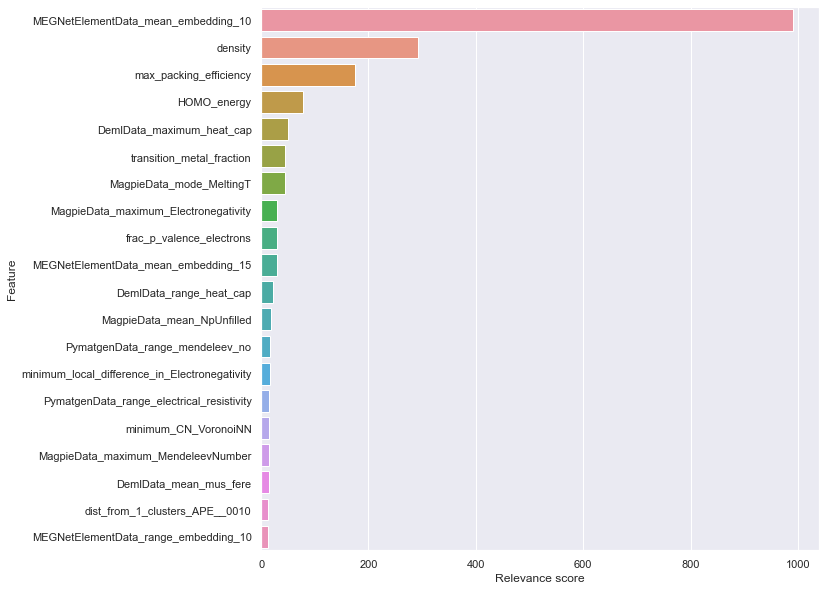

In [13]:
# Obtain feature relevance score
FS.feature_relevance(
                    plot = True, 
                    no_of_features = 20
                    )

In [14]:
# Perform recursive feature selection 
FS.recursive_selection(
                    stratify = False, 
                    oversample_technique = None, 
                    chosen_metric = 'rmse',
                    average = 'weighted',
                    no_to_terminate = 200,
                    max_no_imp = 10
                    )

   No. of rows in training set:  2838
No. of features considering:  1

n=1: mae_train=0.2947, mae_validation=0.4811 
n=1: mse_train=0.1558, mse_validation=0.3508 
n=1: rmse_train=0.3948, rmse_validation=0.5923 
n=1: r2_train=0.5389, r2_validation=-0.0774 
n=1: max_error_train=2.0139, max_error_validation=1.9606 
--- 0.1361238956451416 seconds --- 

No. of features considering:  2

n=2: mae_train=0.1738, mae_validation=0.6073 
n=2: mse_train=0.0624, mse_validation=0.5023 
n=2: rmse_train=0.2498, rmse_validation=0.7087 
n=2: r2_train=0.8153, r2_validation=-0.5426 
n=2: max_error_train=1.7364, max_error_validation=2.2508 
--- 0.07106447219848633 seconds --- 

No. of features considering:  3

n=3: mae_train=0.1264, mae_validation=0.4898 
n=3: mse_train=0.0335, mse_validation=0.3565 
n=3: rmse_train=0.1829, rmse_validation=0.5971 
n=3: r2_train=0.9010, r2_validation=-0.0949 
n=3: max_error_train=1.3993, max_error_validation=1.8266 
--- 0.11310267448425293 seconds --- 

No. of no improvement

,train_mae,va_mae,train_mse,va_mse,train_rmse,va_rmse,train_r_sq,va_r_sq,train_max_error,va_max_error
no_of_features,,,,,,,,,,
1,0.294684,0.481085,0.155830,0.350844,0.394753,0.592321,0.538936,-0.077389,2.013943,1.960552
2,0.173836,0.607306,0.062422,0.502320,0.249844,0.708746,0.815308,-0.542550,1.736376,2.250765
3,0.126418,0.489846,0.033459,0.356546,0.182919,0.597115,0.901001,-0.094901,1.399338,1.826648
4,0.100735,0.357315,0.022133,0.206089,0.148773,0.453970,0.934513,0.367133,1.219409,2.137705
5,0.089866,0.359940,0.017947,0.205647,0.133967,0.453483,0.946898,0.368489,1.191888,2.135918
...,...,...,...,...,...,...,...,...,...,...
195,0.014428,0.250878,0.000594,0.103960,0.024366,0.322428,0.998243,0.680754,0.471346,1.908776
196,0.013874,0.257815,0.000477,0.109269,0.021843,0.330559,0.998588,0.664451,0.367176,1.750788
197,0.013874,0.261060,0.000492,0.112049,0.022181,0.334737,0.998544,0.655915,0.390502,1.655285


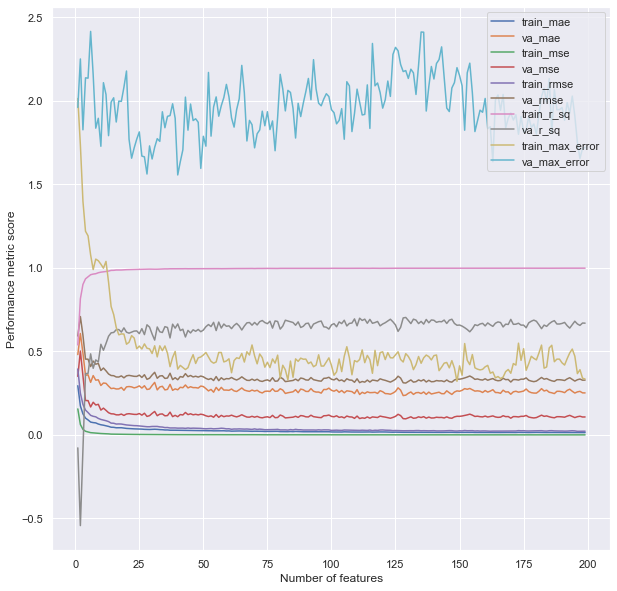

Result saved as: GBFS_convergence_plot_n.pkl


<Figure size 720x720 with 0 Axes>

In [15]:
# Plot the result
FS.convergence_plot()

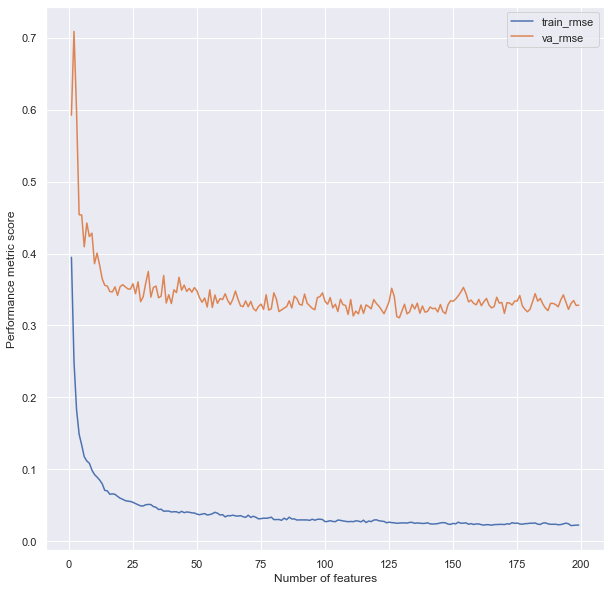

Result saved as: GBFS_convergence_plot_n.pkl


<Figure size 720x720 with 0 Axes>

In [16]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_rmse',
                    validation_metric = 'va_rmse'
                    )

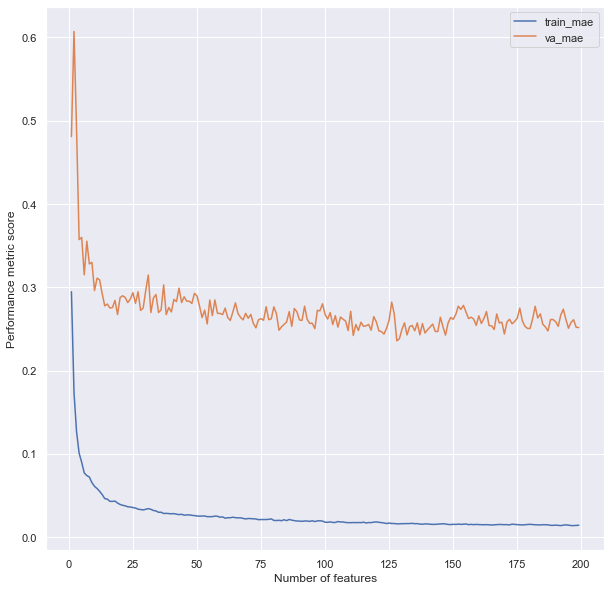

Result saved as: GBFS_convergence_plot_n.pkl


<Figure size 720x720 with 0 Axes>

In [17]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_mae',
                    validation_metric = 'va_mae'
                    )

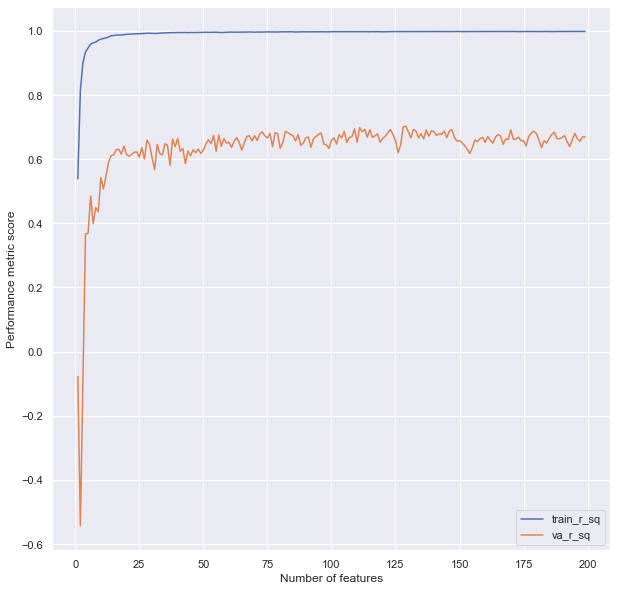

Result saved as: GBFS_convergence_plot_n.pkl


<Figure size 720x720 with 0 Axes>

In [18]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_r_sq',
                    validation_metric = 'va_r_sq'
                    )

In [19]:
# # Plot the result
# FS.convergence_plot(
#                     train_metric = ['train_r_sq', 'train_rmse', 'train_mae'],
#                     validation_metric = ['va_r_sq', 'va_rmse', 'va_mae']
#                     )

##### Statistical Analyses - Regression

In [20]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_analyses as fa

import joblib
import pandas as pd
import numpy as np

In [21]:
# Target
target = 'n'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/5. refractive_index (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features.pkl'

problem = 'regression'

In [22]:
# Initialization 
analyses = fa.perform(
                    path_to_file = path_to_file, 
                    path_to_save = path_to_save, 
                    target = target,
                    features = features
                    )

Name of target column:  n
No. of exploratory features:  3638


In [23]:
df = analyses.remove_constant_features()
df.head()

No. of features removed:  669


,compound_possible,max_ionic_char,avg_ionic_char,H,Li,Be,B,C,N,O,...,LUMO_element_ohe_Zn,LUMO_element_ohe_Zr,crystal_system_ohe_cubic,crystal_system_ohe_hexagonal,crystal_system_ohe_monoclinic,crystal_system_ohe_orthorhombic,crystal_system_ohe_tetragonal,crystal_system_ohe_triclinic,crystal_system_ohe_trigonal,n
4145,1.0,0.065752,0.049520,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.776607
4374,1.0,0.854910,0.560551,0.0,0.0,0.0,0.0,0.0,0.00,0.869565,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.578656
3344,1.0,0.346346,0.198168,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.468573
4342,1.0,0.902639,0.794247,0.0,0.0,0.0,0.0,0.0,0.25,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.946547
57,1.0,0.871682,0.509052,0.0,0.0,0.0,0.0,0.0,0.00,0.803571,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.801577


In [24]:
df_anova = analyses.ANOVA_F_test(
                                problem='regression', 
                                all_features=False, 
                                csv=False
                                )

df_anova

There are:
No. of categorical features:  159
No. of numerical features:  2810 

Considering only the numerical features. 

Result saved as:  ANOVA_F_test_result_n_regression.pkl


,feature_names,f_statistic,f_statistic_scaled
0,MEGNetElementData_mean_embedding_10,2599.614517,1.000000e+00
1,frac_p_valence_electrons,2292.796014,8.819754e-01
2,PymatgenData_maximum_mendeleev_no,2213.763618,8.515738e-01
3,MagpieData_maximum_Electronegativity,2064.349831,7.940984e-01
4,PymatgenData_maximum_X,2064.349831,7.940984e-01
...,...,...,...
2805,MagpieData_mean_GSmagmom,0.000409,1.458480e-07
2806,OFM_d6__s1,0.000336,1.177140e-07
2807,OFM_s1__d6,0.000124,3.613731e-08
2808,OFM_f14__d6,0.000101,2.706439e-08


In [25]:
df_mi = analyses.mutual_information(
                                problem='regression', 
                                csv=False
                                )

df_mi

There are:
No. of categorical features:  159
No. of numerical features:  2810 

Result saved as: MI_result_n.pkl


,feature_names,MI,MI_scaled
0,jml_first_ion_en_divi_mp,0.485898,1.000000
1,jml_first_ion_en_divi_bp,0.474344,0.976222
2,jml_first_ion_en_divi_hfus,0.465666,0.958361
3,frac_p_valence_electrons,0.461273,0.949321
4,MEGNetElementData_mean_embedding_10,0.458534,0.943685
...,...,...,...
2833,OFM_d6__p3,0.000000,0.000000
2834,OFM_d7__d4,0.000000,0.000000
2835,OFM_d7__f14,0.000000,0.000000
2836,OFM_d7__p1,0.000000,0.000000


#### Feature Engineering 

In [26]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_engineering as fe

import joblib
import pandas as pd
import numpy as np

In [27]:
# Target
target = 'n'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/5. refractive_index (done)/'
path_to_save = path + target + '_results/'
path_to_file = path + 'refractive_index_merged_v2.pkl'  # all data

# Either a list or saved file for the features
features = path + 'features.pkl'

problem = 'regression'

In [28]:
# Top n features from ANOVA 
df_anova = joblib.load(path_to_save + 'ANOVA_F_test_result_' + target + '_regression.pkl')

# Top n features
n = 5
anova_features = df_anova['feature_names'].tolist()[:n]

df_anova.iloc[:n, :]

,feature_names,f_statistic,f_statistic_scaled
0,MEGNetElementData_mean_embedding_10,2599.614517,1.000000
1,frac_p_valence_electrons,2292.796014,0.881975
2,PymatgenData_maximum_mendeleev_no,2213.763618,0.851574
3,MagpieData_maximum_Electronegativity,2064.349831,0.794098
4,PymatgenData_maximum_X,2064.349831,0.794098


In [29]:
# Top n features from MI 
df_mi = joblib.load(path_to_save + 'MI_result_' + target + '.pkl')

# Top n features
n = 5
mi_features = df_mi['feature_names'].tolist()[:n]

df_mi.iloc[:n, :]

,feature_names,MI,MI_scaled
0,jml_first_ion_en_divi_mp,0.485898,1.000000
1,jml_first_ion_en_divi_bp,0.474344,0.976222
2,jml_first_ion_en_divi_hfus,0.465666,0.958361
3,frac_p_valence_electrons,0.461273,0.949321
4,MEGNetElementData_mean_embedding_10,0.458534,0.943685


In [30]:
# Top n features from GBFS
df_gbfs = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')

# Top n features
n = 5
gbfs_features = df_gbfs['feature'].tolist()[:n]

df_gbfs.iloc[:n, :]

,feature,relevance_score
0,MEGNetElementData_mean_embedding_10,989.934033
1,density,292.836655
2,max_packing_efficiency,174.636323
3,HOMO_energy,77.489737
4,DemlData_maximum_heat_cap,50.593300


In [31]:
# Initialization
perform = fe.engineering(
                        path_to_file = path_to_file, 
                        path_to_save = path_to_save, 
                        target = target,
                        features = features
                        )

Name of target column:  n
No. of exploratory features:  3638


In [32]:
# Join the features
feature_list = anova_features + mi_features + gbfs_features

print(len(feature_list))
print(feature_list)

15
['MEGNetElementData_mean_embedding_10', 'frac_p_valence_electrons', 'PymatgenData_maximum_mendeleev_no', 'MagpieData_maximum_Electronegativity', 'PymatgenData_maximum_X', 'jml_first_ion_en_divi_mp', 'jml_first_ion_en_divi_bp', 'jml_first_ion_en_divi_hfus', 'frac_p_valence_electrons', 'MEGNetElementData_mean_embedding_10', 'MEGNetElementData_mean_embedding_10', 'density', 'max_packing_efficiency', 'HOMO_energy', 'DemlData_maximum_heat_cap']


In [33]:
# Perform feature engineering
df, new_cols = perform.brute_force(feature_list = feature_list)

df.head()

,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,HOMO_energy/density,density/DemlData_maximum_heat_cap,DemlData_maximum_heat_cap/density,max_packing_efficiency/HOMO_energy,HOMO_energy/max_packing_efficiency,max_packing_efficiency/DemlData_maximum_heat_cap,DemlData_maximum_heat_cap/max_packing_efficiency,HOMO_energy/DemlData_maximum_heat_cap,DemlData_maximum_heat_cap/HOMO_energy,n
0,0.0,0.0,0.0,0.0,1,0.539020,0.134755,0.0,0.0,0.0,...,-0.139512,0.063366,15.781215,-1.360542,-0.735001,0.012028,83.141113,-0.008840,-113.116984,1.752064
1,0.0,0.0,0.0,0.0,1,0.820234,0.195831,0.0,0.0,0.0,...,-0.132907,0.086013,11.626102,-0.857526,-1.166145,0.009803,102.008931,-0.011432,-87.475361,1.652859
2,0.0,0.0,0.0,0.0,1,0.820234,0.196156,0.0,0.0,0.0,...,-0.080143,0.135937,7.356343,-1.021307,-0.979137,0.011127,89.875015,-0.010894,-91.790024,1.867858
3,0.0,0.0,0.0,0.0,1,0.771501,0.159155,0.0,0.0,0.0,...,-0.060424,0.140913,7.096564,-1.311657,-0.762395,0.011168,89.540039,-0.008515,-117.445787,2.676887
4,0.0,0.0,0.0,0.0,1,0.779730,0.165597,0.0,0.0,0.0,...,-0.098571,0.111322,8.982968,-0.895626,-1.116537,0.009828,101.752102,-0.010973,-91.131874,1.793232


In [34]:
perform.save()

Result saved as: df_n_engineered_features.pkl
Result saved as: features_n_engineered.pkl
Result saved as: df_train_n_engineered.pkl
Result saved as: df_test_n_engineered.pkl


#### Multi-Collinearity Reduction

In [35]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import multicollinearity_reduction as mr

import joblib
import pandas as pd
import numpy as np

In [36]:
# Target
target = 'n'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/5. refractive_index (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
n = 80 # Most relevant features defined using the GBFS result
gbfs_cols = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')['feature'].tolist()[:n]
new_cols = joblib.load(path_to_save + 'features_' + target + '_engineered.pkl')
features = gbfs_cols + new_cols

problem = 'regression'

print(len(gbfs_cols))
print(len(new_cols))
len(features)

80
132


212

In [37]:
# Initialize module with path_to_file and path_to_save
data = mr.multicollinearity_reduction(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features 
                                        )

Name of target column:  n
No. of exploratory features:  212


In [38]:
# Remove features with correlation coeff greather than the threshold
col_corr = data.correlation_analysis(threshold = 0.85)
new_features = data.apply_correlation_filter()

Identified correlated features
No. of features remaining:  108
Features saved as: features_selected_from_correlation_analysis_n.pkl


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Figure saved as: Dendrogram_n.png


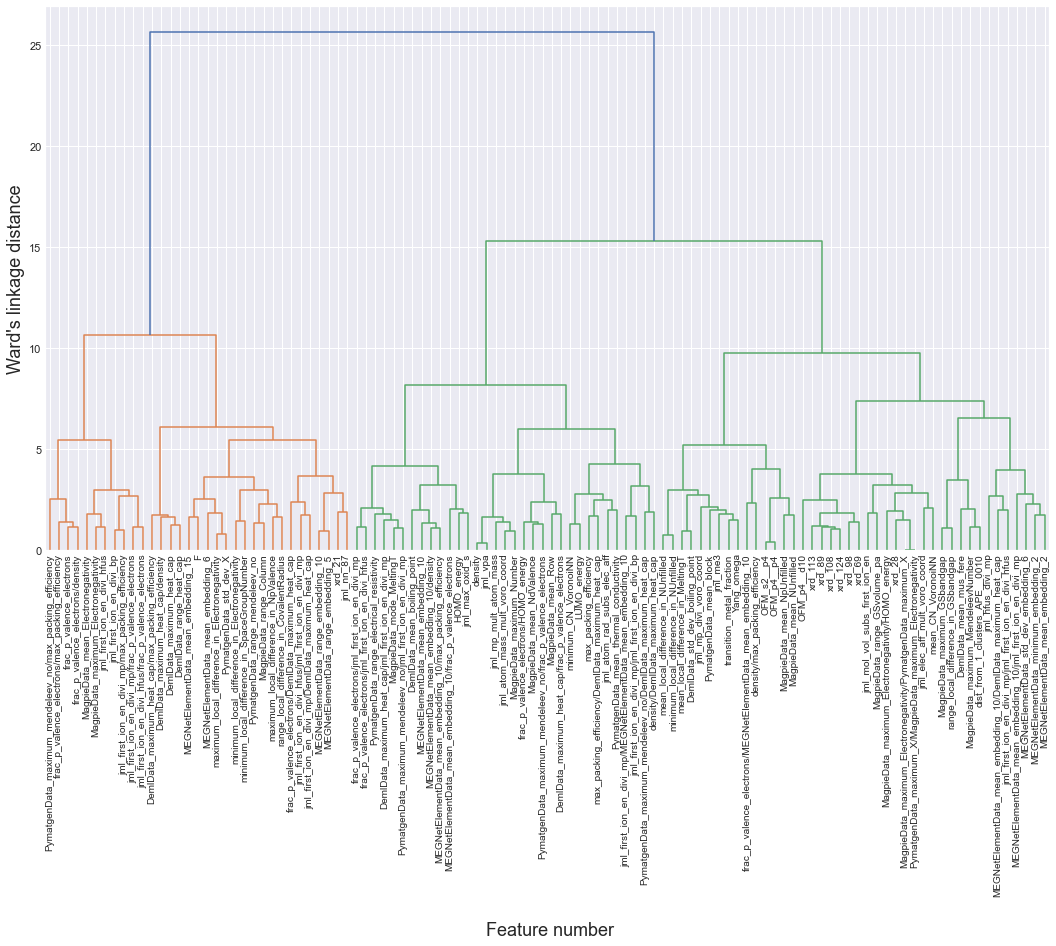

In [39]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
data.hierarchical_cluster_analysis()

In [40]:
# Select features based on the given linkage threshold
threshold_list = [1, 2, 3, 4, 5]

for i in threshold_list:
    final_features = data.apply_linkage_threshold(threshold = i)

Number of features remaining:  99
Features saved as features_selected_from_hierarchical_analysis_n_threshold_1.pkl
Number of features remaining:  50
Features saved as features_selected_from_hierarchical_analysis_n_threshold_2.pkl
Number of features remaining:  25
Features saved as features_selected_from_hierarchical_analysis_n_threshold_3.pkl
Number of features remaining:  16
Features saved as features_selected_from_hierarchical_analysis_n_threshold_4.pkl
Number of features remaining:  13
Features saved as features_selected_from_hierarchical_analysis_n_threshold_5.pkl


In [41]:
# threshold_list = np.linspace(3, 4, 6)

# for i in threshold_list:
#     final_features = data.apply_linkage_threshold(threshold = i)

#### Recursive Feature Elimination

In [42]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import recursive_feature_elimination as rfe

import joblib
import pandas as pd

In [43]:
# Target
target = 'n'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/5. refractive_index (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')

scaled = False

problem = 'regression'

In [44]:
# Initialize module with path_to_file and path_to_save
run = rfe.recursive_feature_elimination(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features,
                                        scaled = False,
                                        problem = problem
                                        )

Target: n
No. of features: 50


In [45]:
# Run RFE
estimator = run.base_model(boosting_method = 'lightGBM')
RFE_features = run.perform()

Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 fe

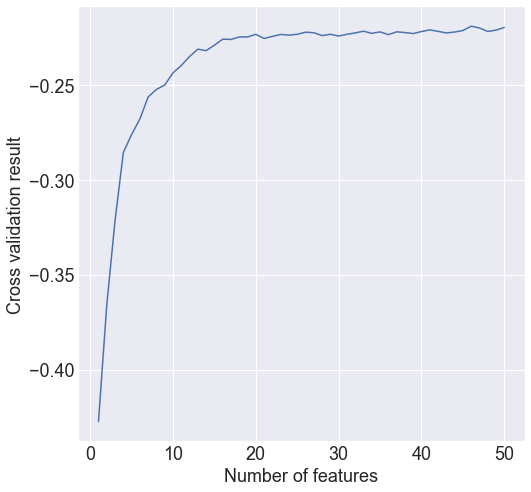

Figure saved as: RFE_plot_n.png


In [46]:
# Plot figure
run.RFE_plot()

#### Test Dummy Model

In [47]:
### test result to find best threshold

import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [48]:
# Target
target = 'n'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/5. refractive_index (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')
scaled = False
print('No. of features:', len(features))

problem = 'regression'

No. of features: 50


In [49]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                

df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

In [50]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective='regression',
                    importance_type='gain',
                    learning_rate=0.1,
                    n_estimators=350,
                    num_leaves=40,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', n_estimators=350, num_leaves=40,
              objective='regression', random_state=42)

In [51]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_lambda_max': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_lambda_max': predicted_target
                        })

# Eliminate zeros (?)
df_pred['adj_pred_lambda_max'] = df_pred['pred_lambda_max']
df_pred['adj_pred_lambda_max'] = df_pred['adj_pred_lambda_max'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_lambda_max']
y_pred_adj = df_pred['adj_pred_lambda_max']
y_pred = df_pred['pred_lambda_max']

In [52]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: 4.036871726143071
Min value: 1.0000000000000018


In [53]:
def plot(df_pred, adj=True):
        # Plot results
        max_value = 5
        min_value = 1

        X = df_pred['act_lambda_max']
        if adj is True:
                Y = df_pred['adj_pred_lambda_max']
        else:
                Y = df_pred['pred_lambda_max']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10)) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.12)

        offset = 0.15
        # line of best fit
        linear_fit = np.linspace(min_value-offset, max_value-offset*2, max_value)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(min_value-offset, max_value-offset*2, max_value)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(min_value, max_value, 5)

        onset = 0.25
        ax_scatter.set_xlabel('DFT Calculation of Refractive Index)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of Refractive Index)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(min_value-onset, max_value+onset-0.25)
        ax_scatter.set_ylim(min_value-onset, max_value+onset-0.25)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(min_value-onset, max_value+onset-0.25)
        ax_hist_x.set_xticks([0, 20, 40])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(min_value-onset, max_value+onset-0.25)
        ax_hist_y.set_yticks([0, 20, 40])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        ax_hist_y.hist(
                        y_pred_adj, 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )
        ax_hist_x.hist(
                        y_test, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(3.5, 3.92, r'$y = x$', fontdict=font1)
        ax_scatter.text(3.93, 3.52, r'$y = ' + str(round(results.params[1],1)) + 'x - ' + str(round(results.params[0],1)) + '$', fontdict=font2)

        r2 = r2_score(X, Y)
        ax_scatter.text(3.75, 1.23, r'$R^{2}$ = ' + str(round(r2,2)), fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(3.75, 1.07, r'$MAE$ = ' + str(round(mae,2)) , fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(3.75, 0.88, r'$RMSE$ = ' + str(round(mse,2)), fontdict=font3)

        #final_figure
        #fig.savefig('final_regression_mag_v1.png', dpi = 500, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:        pred_lambda_max   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     5969.
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        17:45:53   Log-Likelihood:                 206.68
No. Observations:                 888   AIC:                            -409.4
Df Residuals:                     886   BIC:                            -399.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3039      0.025     12.

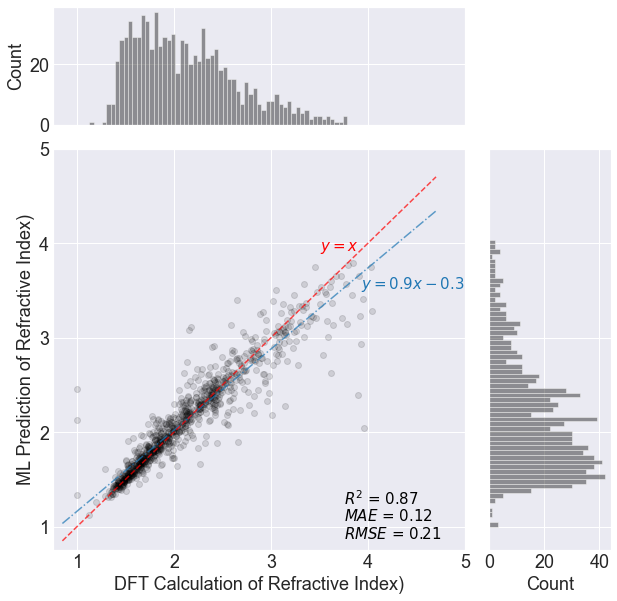

m =  0.8586962546187957
c =  0.30392693677751625 

MAE:  0.11982357078668507
MSE:  0.043472692442092294
RMSE:  0.20850106100951213
R-squared:  0.8705578734680408
Max error:  1.9124551854416687
Explained_variance_score:  0.8705810121631199


In [54]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

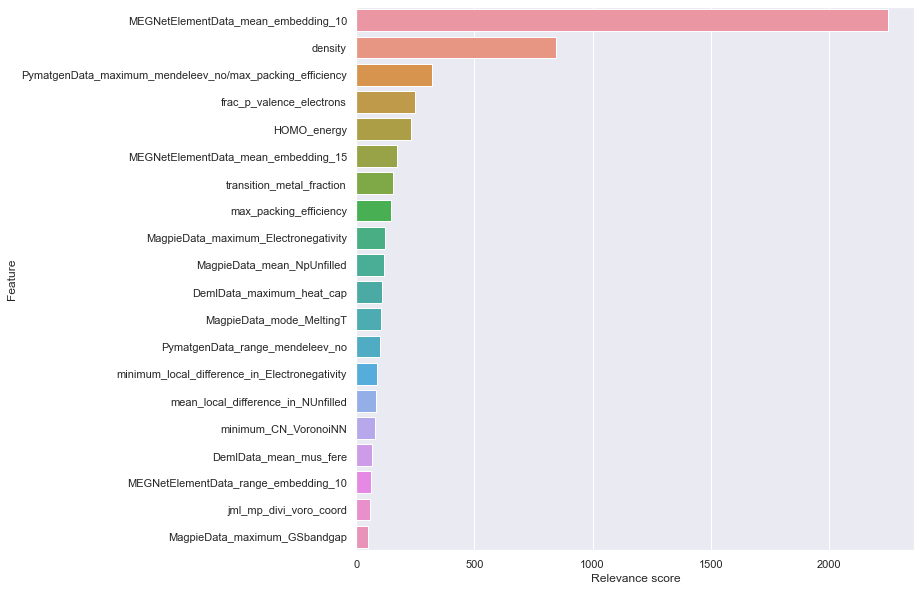

In [55]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)


#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})

# Number of features to plot
no_of_features = 20

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

#### Bayesian Optimization 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import optimization as opt

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'n'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/5. refractive_index (done)/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'

path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'regression'

scaled = False

In [3]:
# Initialization
final_stage = opt.optimization(
                            path_to_train_data = path_to_train_data,
                            path_to_test_data = path_to_test_data,
                            path_to_save = path_to_save,
                            features = path_to_features,
                            target = target,
                            problem = problem,
                            scaled = scaled
                            )

Name of target column:  n
No. of exploratory features:  46


In [4]:
# Choose ML model
final_stage.base_model(boosting_method = 'lightGBM')

LGBMRegressor(importance_type='gain', random_state=42)

In [5]:
# Define hyperparameters; range should be edited directly from the script
final_stage.set_hyperparameters()

(['learning_rate', 'n_estimators', 'num_leaves'],
 [Real(low=0.01, high=1.0, prior='log-uniform', transform='identity'),
  Integer(low=100, high=800, prior='uniform', transform='identity'),
  Integer(low=10, high=100, prior='uniform', transform='identity')])

In [6]:
# optimization_method: dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
final_stage.run(optimization_method = 'bayesian')

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.08302258331908664, 'n_estimators': 544, 'num_leaves': 39} 

Score:  0.22074559761118953 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 3.4501
Function value obtained: 0.2207
Current minimum: 0.2207
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.2607553849903009, 'n_estimators': 446, 'num_leaves': 76} 

Score:  0.23031502970242598 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 3.5532
Function value obtained: 0.2303
Current minimum: 0.2207
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.8435768804228153, 'n_estimators': 122, 'num_leaves': 21} 

Score:  0.2926069577241259 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.3272
Function value obtained: 0.2926
Current minimum: 0.2207
Iteration No: 4 started. Evaluating function at random point.

 {'learning_rate': 0.0134

Saved: Optimisation_result_n.png


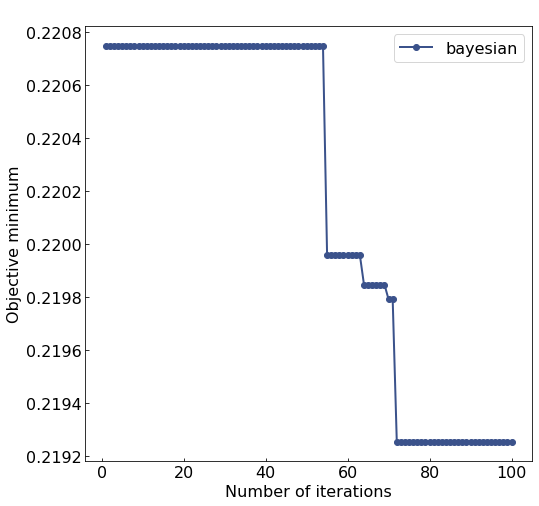

In [7]:
# Plot convergence plot
final_stage.convergence_plot()

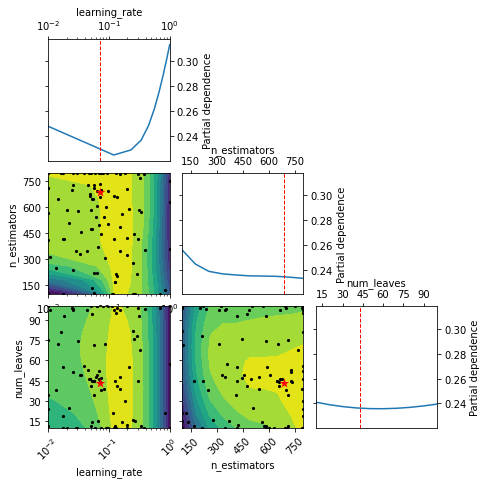

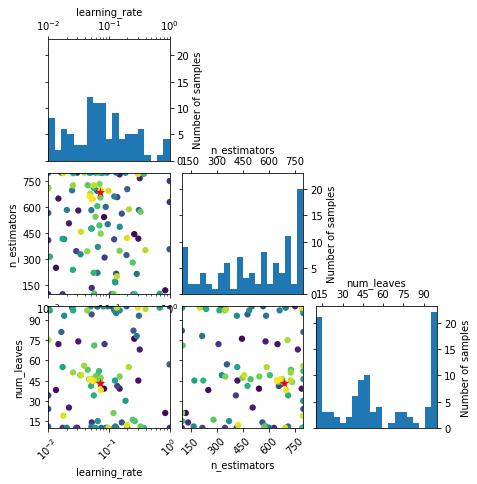

In [8]:
# objective and evaluation plot
final_stage.objective_plot()

In [9]:
# Train model with optimal hyperparameter identified
final_stage.train_model()

LGBMRegressor(importance_type='gain', learning_rate=0.07228488184466103,
              n_estimators=688, num_leaves=43, random_state=42)

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     6200.
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        17:53:49   Log-Likelihood:                 222.83
No. Observations:                 888   AIC:                            -441.7
Df Residuals:                     886   BIC:                            -432.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3010      0.024     12.485      0.0

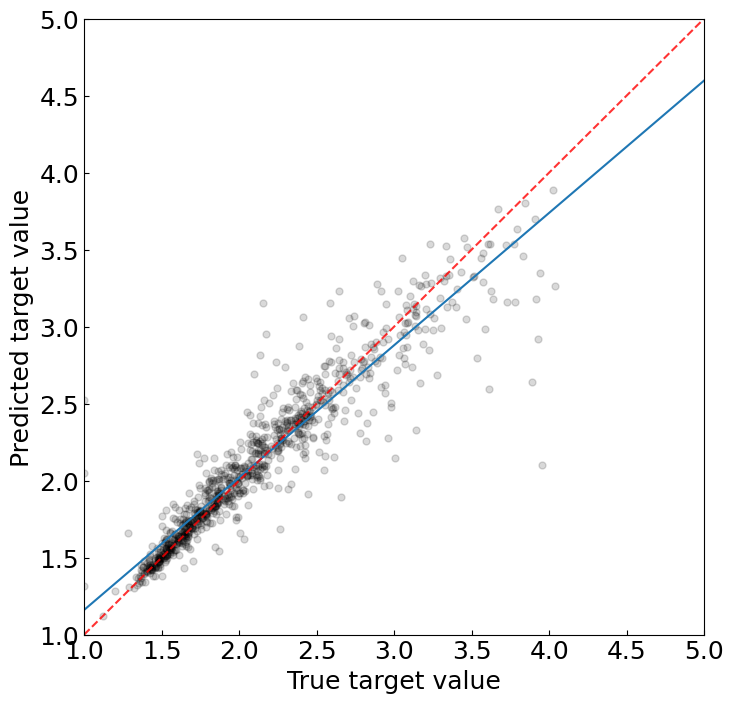

Saved: regression_plot_n.png


In [11]:
# Evaluate model using test set
final_stage.evaluate(
                    strategy = 'weighted', 
                    adjusted = False, 
                    max_value = 5,
                    min_value = 1
                    )


### Final Figure

In [1]:
import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Target
target = 'n'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/5. refractive_index (done)/'
path_to_save = path + target + '_results/'

# Features
features = joblib.load(path_to_save + 'features_selected_from_RFE_' + target + '.pkl')
print(len(features))

# Path to training data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

problem = 'regression'

scaled = False

46


In [3]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective=problem,
                    importance_type='gain',
                    learning_rate=0.07228488184466103,
                    n_estimators=688,
                    num_leaves=43,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', learning_rate=0.07228488184466103,
              n_estimators=688, num_leaves=43, objective='regression',
              random_state=42)

In [4]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_lambda_max': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_lambda_max': predicted_target
                        })

# Eliminate zeros (?)
df_pred['adj_pred_lambda_max'] = df_pred['pred_lambda_max']
df_pred['adj_pred_lambda_max'] = df_pred['adj_pred_lambda_max'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_lambda_max']
y_pred_adj = df_pred['adj_pred_lambda_max']
y_pred = df_pred['pred_lambda_max']

In [5]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: 4.036871726143071
Min value: 1.0000000000000018


In [8]:
def plot(df_pred, adj=True):
        # Plot results
        max_value = 5
        min_value = 1

        X = df_pred['act_lambda_max']
        if adj is True:
                Y = df_pred['adj_pred_lambda_max']
        else:
                Y = df_pred['pred_lambda_max']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10)) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.12)

        offset = 0.15
        # line of best fit
        linear_fit = np.linspace(min_value-offset, max_value-offset*2, max_value)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(min_value-offset, max_value-offset*2, max_value)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(min_value, max_value, 5)

        onset = 0.25
        ax_scatter.set_xlabel('DFT Calculation of Refractive Index)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of Refractive Index)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(min_value-onset, max_value+onset-0.25)
        ax_scatter.set_ylim(min_value-onset, max_value+onset-0.25)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(min_value-onset, max_value+onset-0.25)
        ax_hist_x.set_xticks([0, 20, 40])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(min_value-onset, max_value+onset-0.25)
        ax_hist_y.set_yticks([0, 15, 30])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        ax_hist_y.hist(
                        y_pred_adj, 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )
        ax_hist_x.hist(
                        y_test, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(3.5, 3.92, r'$y = x$', fontdict=font1)
        ax_scatter.text(3.93, 3.52, r'$y = ' + str(round(results.params[1],1)) + 'x - ' + str(round(results.params[0],1)) + '$', fontdict=font2)

        r2 = r2_score(X, Y)
        ax_scatter.text(3.75, 1.23, r'$R^{2}$ = ' + str(round(r2,2)), fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(3.75, 1.07, r'$MAE$ = ' + str(round(mae,2)) , fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(3.75, 0.88, r'$RMSE$ = ' + str(round(mse,2)), fontdict=font3)

        #final_figure
        #fig.savefig('final_regression_mag_v1.png', dpi = 500, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:        pred_lambda_max   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     6136.
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        17:55:09   Log-Likelihood:                 215.15
No. Observations:                 888   AIC:                            -426.3
Df Residuals:                     886   BIC:                            -416.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2962      0.024     12.

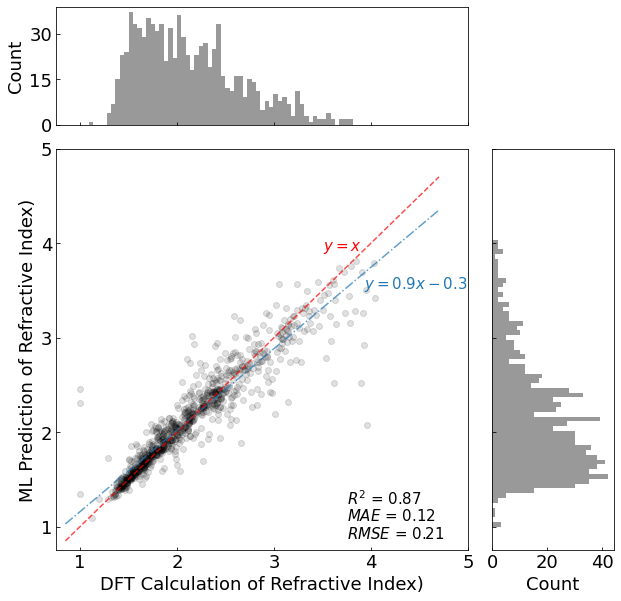

m =  0.8623788613209334
c =  0.2961901853198628 

MAE:  0.11742773585764472
MSE:  0.04243334347853232
RMSE:  0.20599355203144668
R-squared:  0.8736525872410881
Max error:  1.8770150303033262
Explained_variance_score:  0.8736776127444292


In [9]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

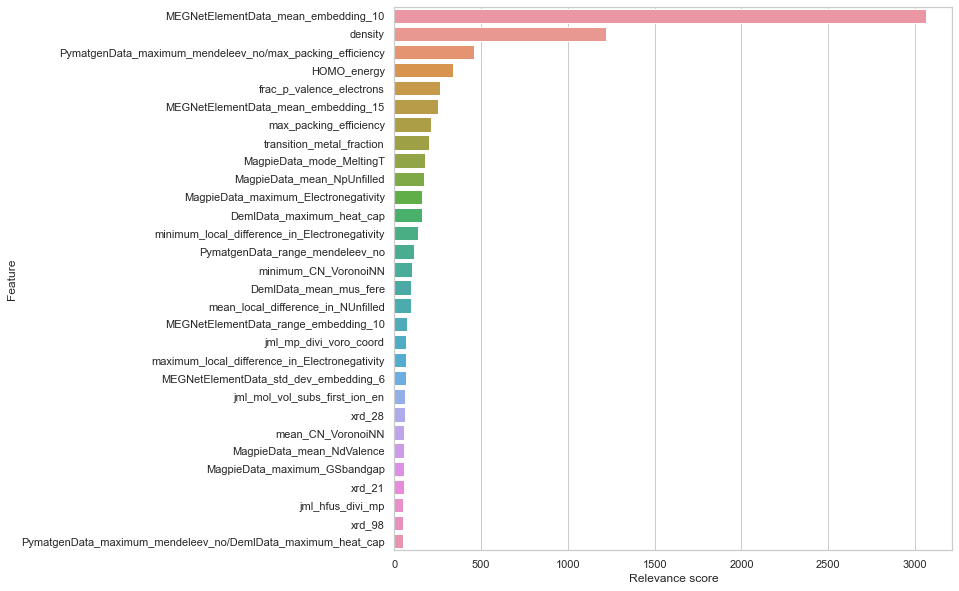

In [10]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)

#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

# Number of features to plot
no_of_features = 30

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

# plt.savefig('feature_relevance_plot_experimental_bayesian_scaffold_split_v2.png', dpi = 300)